In [3]:
# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [12]:
# ============================================================================
# 2. READ THE DATA
# ============================================================================
# Note: The file uses semicolon (;) as separator
# IMPORTANT: Skip row 1 (index 1) which contains descriptive labels, not data
# Row 0: Headers (Y;X1;X2;...)
# Row 1: Descriptive labels (Display;cor_sales_in_vol;...) - SKIP THIS!
# Row 2+: Actual data
df = pd.read_csv('Data/raw/new_Base_CDM_balanced_V2.csv', sep=';', skiprows=[1])

# Convert continuous variables to numeric (they might be read as strings)
continuous_cols = ['X1', 'X2', 'X3', 'X4', 'X6']
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display basic information about the dataset
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
print(df.describe())

DATASET OVERVIEW

Dataset shape: (25782, 8)

Column names: ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

First few rows:
          Y   X1     X2      X3  X4         X5     X6       X7
0  No_Displ  2.0  20.20   47400  36       CORA   72.0  No_Feat
1  No_Displ  2.0  11.90   62000  24    LECLERC   48.0  No_Feat
2  No_Displ  8.0  29.52   60661  60     AUCHAN  480.0  No_Feat
3  No_Displ  2.0  16.20   59677  19  CARREFOUR   38.0  No_Feat
4  No_Displ  5.0  62.10  142602  50       CORA  250.0  No_Feat

Data types:
Y      object
X1    float64
X2    float64
X3      int64
X4      int64
X5     object
X6    float64
X7     object
dtype: object

Missing values:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

Basic statistics:
                 X1            X2             X3            X4            X6
count  25782.000000  25782.000000   25782.000000  25782.000000  25782.000000
mean      13.767151    130.888312   64641.184431     37.646614    587.855260
std       38.20

## Data Balancing Analysis
Analyzing the distribution of the target variable to check for class imbalance.


DATA BALANCING ANALYSIS

1. CLASS DISTRIBUTION (Counts):
--------------------------------------------------------------------------------
Y
No_Displ    13000
Displ       12782
Name: count, dtype: int64

2. CLASS DISTRIBUTION (Percentages):
--------------------------------------------------------------------------------
Y
No_Displ    50.42
Displ       49.58
Name: proportion, dtype: float64

3. IMBALANCE RATIO:
--------------------------------------------------------------------------------
   Majority class: 13000 samples
   Minority class: 12782 samples
   Imbalance ratio: 1.017
   (Ratio of 1.0 = perfectly balanced, >2.0 = imbalanced)

   ✓ Dataset is WELL BALANCED (ratio < 1.1)

4. VISUALIZATIONS:
--------------------------------------------------------------------------------


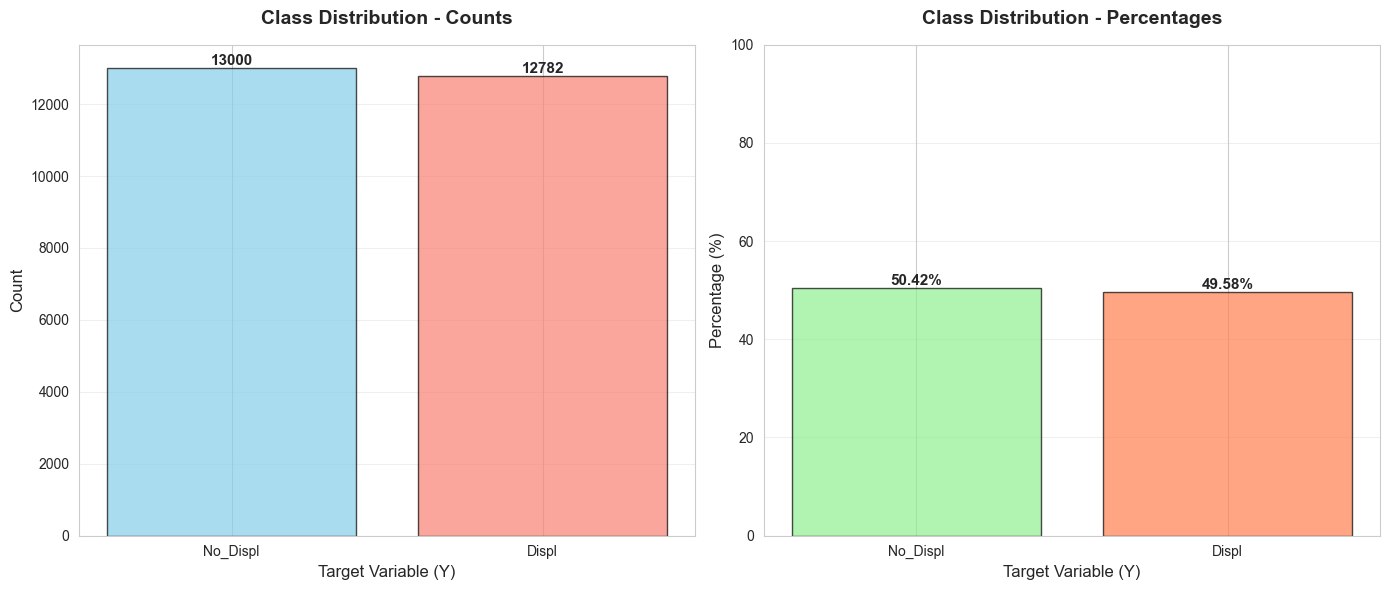

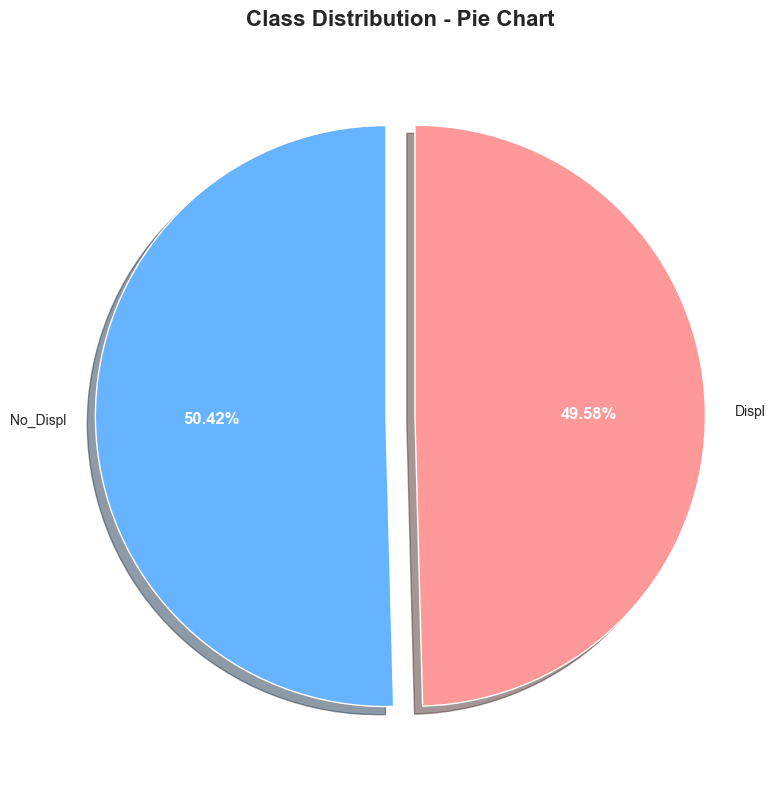


5. SUMMARY STATISTICS:
--------------------------------------------------------------------------------
   Total samples: 25782
   Number of classes: 2
   Classes: ['No_Displ', 'Displ']

   Class distribution:
     - No_Displ: 13000 samples (50.42%)
     - Displ: 12782 samples (49.58%)

ANALYSIS COMPLETE


In [5]:
# ============================================================================
# DATA BALANCING ANALYSIS - TARGET VARIABLE (Y)
# ============================================================================
print("=" * 80)
print("DATA BALANCING ANALYSIS")
print("=" * 80)

# Target variable
target = 'Y'

# Count distribution
print("\n1. CLASS DISTRIBUTION (Counts):")
print("-" * 80)
class_counts = df[target].value_counts()
print(class_counts)

# Percentage distribution
print("\n2. CLASS DISTRIBUTION (Percentages):")
print("-" * 80)
class_percentages = df[target].value_counts(normalize=True) * 100
print(class_percentages.round(2))

# Calculate imbalance ratio
if len(class_counts) == 2:
    min_class = class_counts.min()
    max_class = class_counts.max()
    imbalance_ratio = max_class / min_class
    print(f"\n3. IMBALANCE RATIO:")
    print("-" * 80)
    print(f"   Majority class: {max_class} samples")
    print(f"   Minority class: {min_class} samples")
    print(f"   Imbalance ratio: {imbalance_ratio:.3f}")
    print(f"   (Ratio of 1.0 = perfectly balanced, >2.0 = imbalanced)")
    
    if imbalance_ratio < 1.1:
        print(f"\n   ✓ Dataset is WELL BALANCED (ratio < 1.1)")
    elif imbalance_ratio < 2.0:
        print(f"\n   ⚠ Dataset is MODERATELY IMBALANCED (ratio 1.1-2.0)")
    else:
        print(f"\n   ✗ Dataset is HIGHLY IMBALANCED (ratio > 2.0)")

# Visualizations
print("\n4. VISUALIZATIONS:")
print("-" * 80)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot - Counts
axes[0].bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'], alpha=0.7, edgecolor='black')
axes[0].set_title('Class Distribution - Counts', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Target Variable (Y)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
# Add count labels on bars
for i, (idx, val) in enumerate(class_counts.items()):
    axes[0].text(i, val, str(val), ha='center', va='bottom', fontweight='bold', fontsize=11)

# Bar plot - Percentages
axes[1].bar(class_percentages.index, class_percentages.values, color=['lightgreen', 'coral'], alpha=0.7, edgecolor='black')
axes[1].set_title('Class Distribution - Percentages', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Target Variable (Y)', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_ylim([0, 100])
axes[1].grid(axis='y', alpha=0.3)
# Add percentage labels on bars
for i, (idx, val) in enumerate(class_percentages.items()):
    axes[1].text(i, val, f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Pie chart
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
colors = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = ax.pie(class_counts.values, 
                                  labels=class_counts.index, 
                                  autopct='%1.2f%%',
                                  startangle=90,
                                  colors=colors,
                                  explode=(0.05, 0.05),
                                  shadow=True)
ax.set_title('Class Distribution - Pie Chart', fontsize=16, fontweight='bold', pad=20)
# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n5. SUMMARY STATISTICS:")
print("-" * 80)
print(f"   Total samples: {len(df)}")
print(f"   Number of classes: {len(class_counts)}")
print(f"   Classes: {list(class_counts.index)}")
print(f"\n   Class distribution:")
for class_name, count in class_counts.items():
    percentage = class_percentages[class_name]
    print(f"     - {class_name}: {count} samples ({percentage:.2f}%)")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)


In [6]:
# ============================================================================
# 3. IDENTIFY VARIABLE TYPES
# ============================================================================
# Target variable
target = 'Y'  # Display variable

# Continuous variables (X1, X2, X3, X4, X6)
continuous_vars = ['X1', 'X2', 'X3', 'X4', 'X6']
# X1: cor_sales_in_vol
# X2: cor_sales_in_val
# X3: CA_mag
# X4: value
# X6: VenteConv

# Nominal variables (X5, X7)
nominal_vars = ['X5', 'X7']
# X5: ENSEIGNE (store names)
# X7: Feature (No_Feat / Feat)

print("\n" + "=" * 80)
print("VARIABLE IDENTIFICATION")
print("=" * 80)
print(f"\nTarget variable: {target}")
print(f"Target distribution:\n{df[target].value_counts()}")
print(f"\nContinuous variables: {continuous_vars}")
print(f"Nominal variables: {nominal_vars}")


VARIABLE IDENTIFICATION

Target variable: Y
Target distribution:
Y
No_Displ    13000
Displ       12782
Name: count, dtype: int64

Continuous variables: ['X1', 'X2', 'X3', 'X4', 'X6']
Nominal variables: ['X5', 'X7']



CORRELATION ANALYSIS

Correlation Matrix (Continuous Variables):
          X1        X2        X3        X4        X6
X1  1.000000  0.858353  0.266049  0.077496  0.882588
X2  0.858353  1.000000  0.297886  0.230587  0.928348
X3  0.266049  0.297886  1.000000  0.127276  0.275925
X4  0.077496  0.230587  0.127276  1.000000  0.288883
X6  0.882588  0.928348  0.275925  0.288883  1.000000


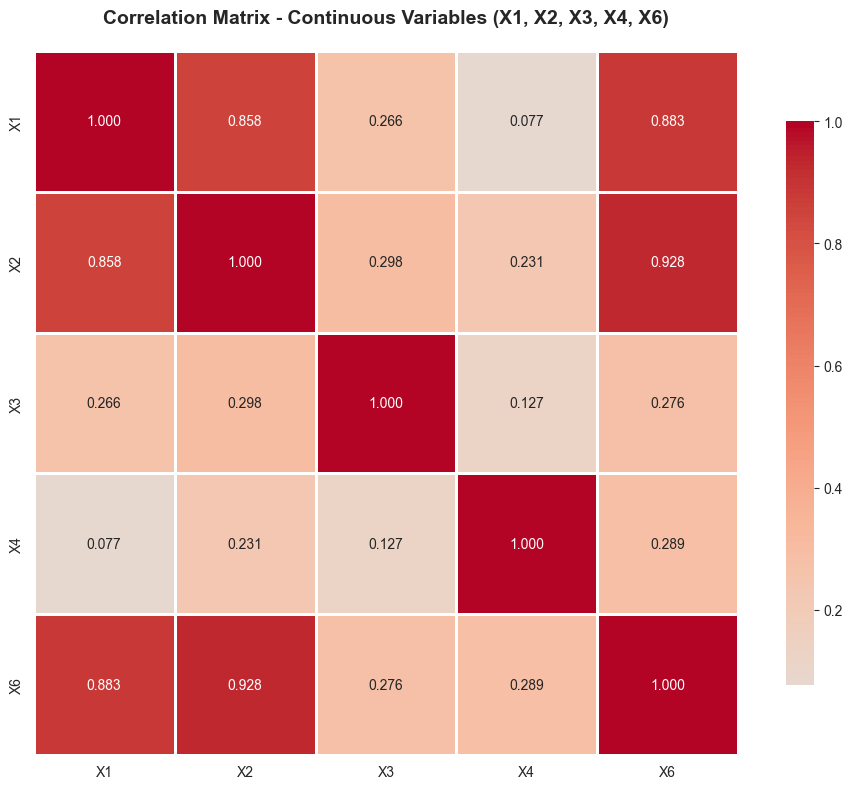

In [7]:
# ============================================================================
# 4. CORRELATION MATRIX FOR CONTINUOUS VARIABLES
# ============================================================================
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix for continuous variables
correlation_matrix = df[continuous_vars].corr()

print("\nCorrelation Matrix (Continuous Variables):")
print(correlation_matrix)
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix - Continuous Variables (X1, X2, X3, X4, X6)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## Scatter Plots: Continuous Variables Colored by Target
Visualizing relationships between pairs of continuous variables, with points colored by the target variable (Y) to see class separation.


SCATTER PLOT ANALYSIS: Continuous Variables Colored by Target

Generating scatter plots for all pairs of continuous variables...
Total pairs: 10

  ✓ Created scatter plot: X1 vs X2
  ✓ Created scatter plot: X1 vs X3
  ✓ Created scatter plot: X1 vs X4
  ✓ Created scatter plot: X1 vs X6
  ✓ Created scatter plot: X2 vs X3
  ✓ Created scatter plot: X2 vs X4
  ✓ Created scatter plot: X2 vs X6
  ✓ Created scatter plot: X3 vs X4
  ✓ Created scatter plot: X3 vs X6
  ✓ Created scatter plot: X4 vs X6


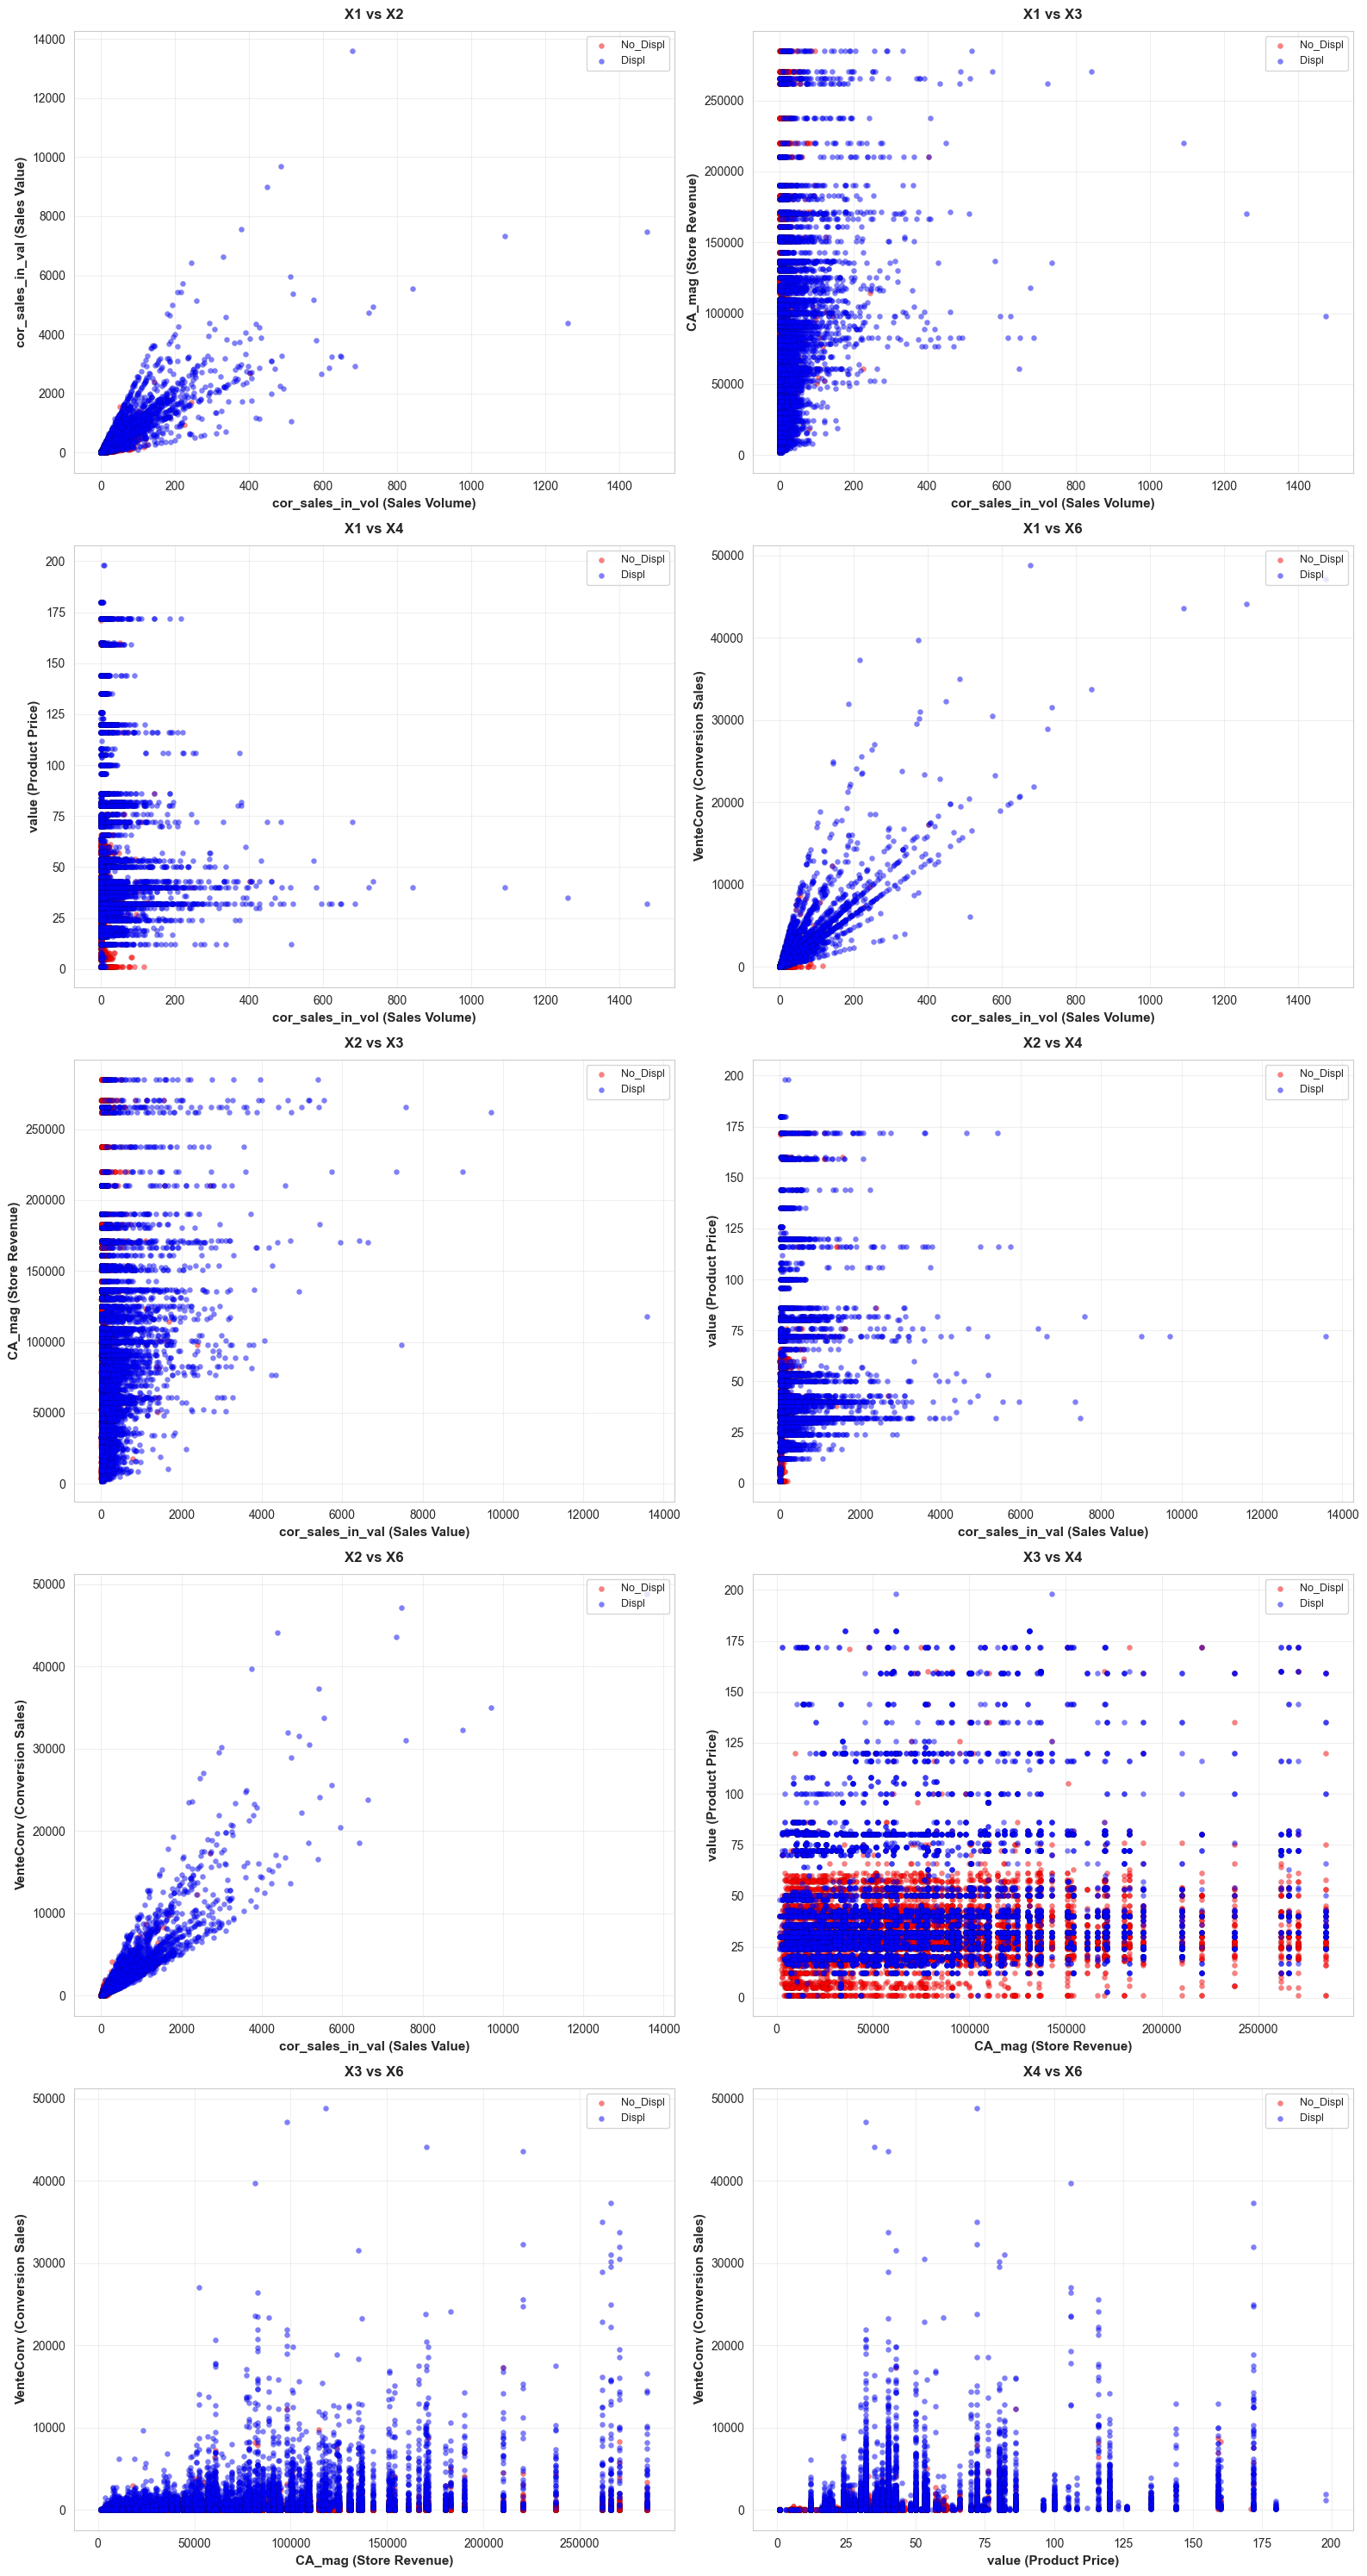


✓ All scatter plots generated successfully!


In [8]:
# ============================================================================
# SCATTER PLOTS: CONTINUOUS VARIABLES COLORED BY TARGET (Y)
# ============================================================================
print("=" * 80)
print("SCATTER PLOT ANALYSIS: Continuous Variables Colored by Target")
print("=" * 80)

# Define continuous variables and their labels
continuous_vars = ['X1', 'X2', 'X3', 'X4', 'X6']
var_labels = {
    'X1': 'cor_sales_in_vol (Sales Volume)',
    'X2': 'cor_sales_in_val (Sales Value)',
    'X3': 'CA_mag (Store Revenue)',
    'X4': 'value (Product Price)',
    'X6': 'VenteConv (Conversion Sales)'
}

target = 'Y'

# Get unique classes for coloring
classes = df[target].unique()
colors_map = {'No_Displ': 'red', 'Displ': 'blue'}  # You can change colors here
# If you want more colors, you can use: colors_map = {'No_Displ': '#FF6B6B', 'Displ': '#4ECDC4'}

# Generate all pairs of continuous variables
from itertools import combinations

print(f"\nGenerating scatter plots for all pairs of continuous variables...")
print(f"Total pairs: {len(list(combinations(continuous_vars, 2)))}\n")

# Create scatter plots for each pair
pairs = list(combinations(continuous_vars, 2))

# Calculate grid size for subplots (we'll show 2 plots per row)
n_pairs = len(pairs)
n_cols = 2
n_rows = (n_pairs + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
axes = axes.flatten() if n_pairs > 1 else [axes]

for idx, (var1, var2) in enumerate(pairs):
    ax = axes[idx]
    
    # Plot each class with different colors
    for class_val in classes:
        mask = df[target] == class_val
        ax.scatter(df[mask][var1], df[mask][var2], 
                  c=colors_map.get(class_val, 'gray'), 
                  label=class_val, 
                  alpha=0.5, 
                  s=20,  # point size
                  edgecolors='black', 
                  linewidths=0.1)
    
    # Customize plot
    ax.set_xlabel(var_labels.get(var1, var1), fontsize=11, fontweight='bold')
    ax.set_ylabel(var_labels.get(var2, var2), fontsize=11, fontweight='bold')
    ax.set_title(f'{var1} vs {var2}', fontsize=12, fontweight='bold', pad=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    print(f"  ✓ Created scatter plot: {var1} vs {var2}")

# Hide unused subplots
for idx in range(n_pairs, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✓ All scatter plots generated successfully!")
print("=" * 80)



DISTRIBUTION ANALYSIS: Y vs CONTINUOUS VARIABLES

Unique Y values: ['No_Displ' 'Displ']

--- Analysis for X1 ---

Statistical summary of X1 by Y:
            count       mean        std  min  25%  50%   75%     max
Y                                                                   
Displ     12782.0  22.730623  52.045841  1.0  2.0  7.0  21.0  1475.0
No_Displ  13000.0   4.953990   8.637923  1.0  1.0  3.0   5.0   403.0


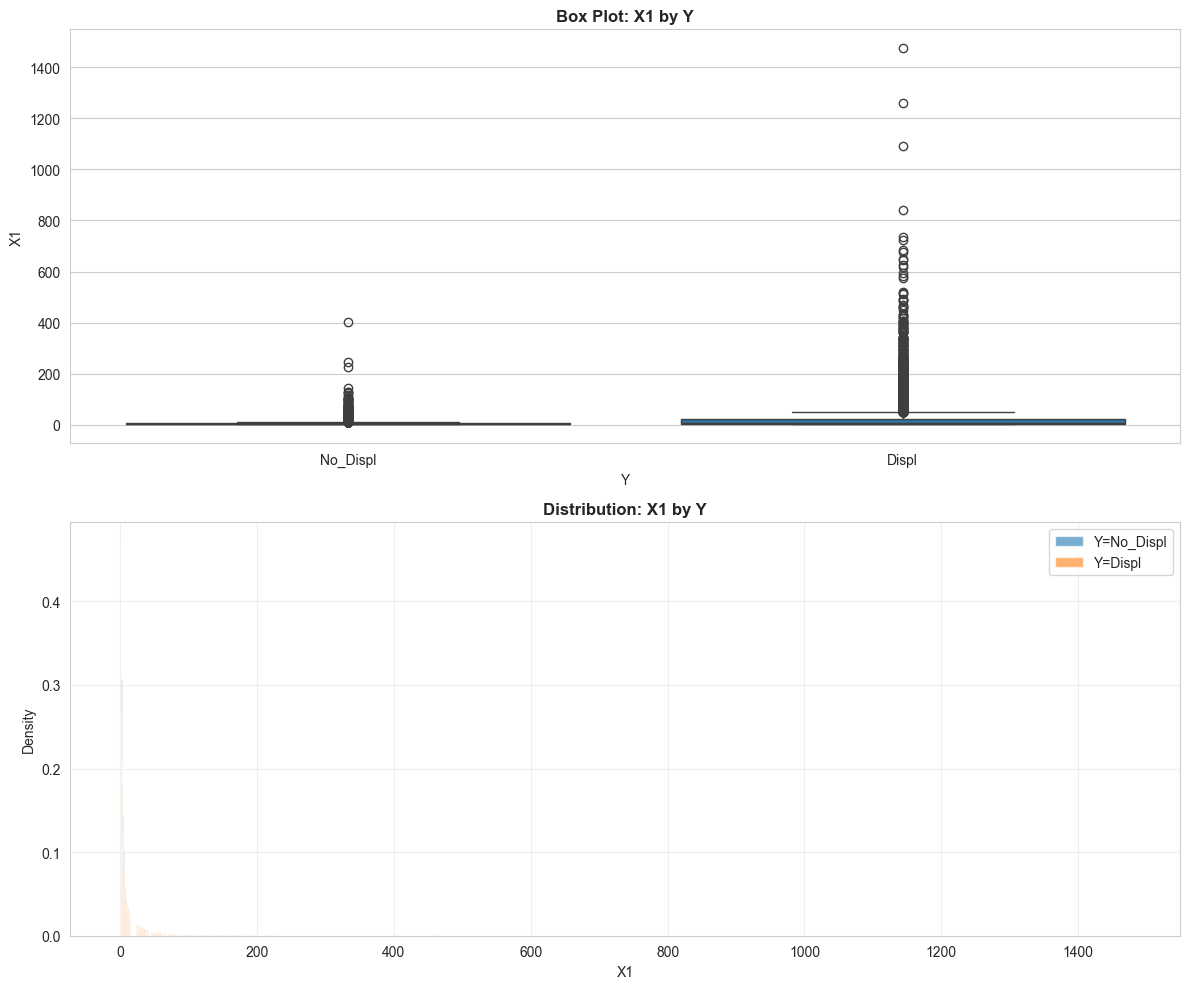


T-test results (No_Displ vs Displ): t-statistic=-38.4092, p-value=0.0000
Mann-Whitney U test (No_Displ vs Displ): U-statistic=51968074.0000, p-value=0.0000

--- Analysis for X2 ---

Statistical summary of X2 by Y:
            count        mean         std   min    25%     50%       75%  \
Y                                                                          
Displ     12782.0  224.892529  506.591214  1.43  20.52  59.635  196.7875   
No_Displ  13000.0   38.460475   76.511118  1.11  10.05  20.500   41.4550   

               max  
Y                   
Displ     13589.22  
No_Displ   2704.13  


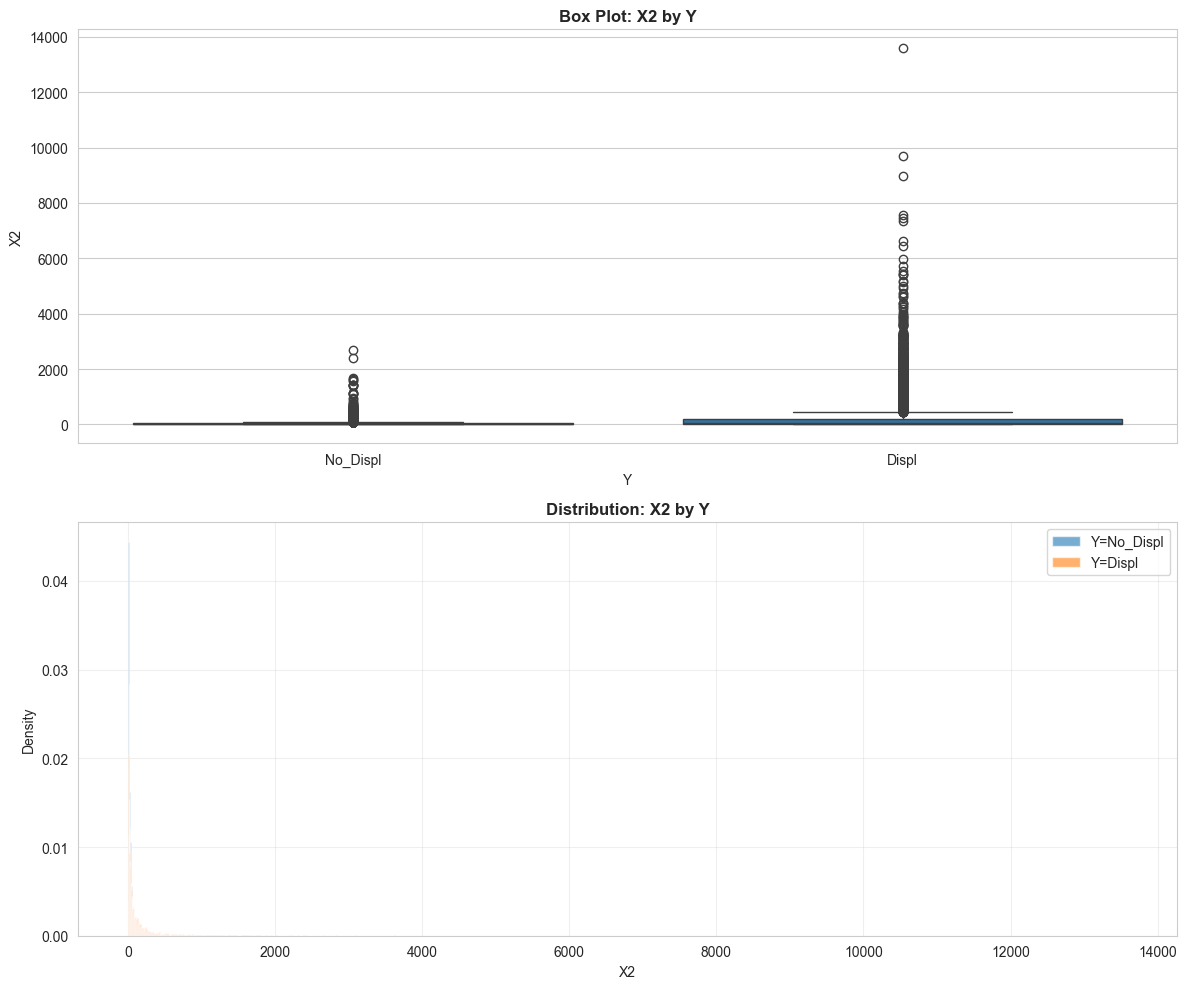


T-test results (No_Displ vs Displ): t-statistic=-41.4815, p-value=0.0000
Mann-Whitney U test (No_Displ vs Displ): U-statistic=46194040.5000, p-value=0.0000

--- Analysis for X3 ---

Statistical summary of X3 by Y:
            count          mean           std     min      25%      50%  \
Y                                                                         
Displ     12782.0  64029.348459  52527.687893  1693.0  23502.0  51522.0   
No_Displ  13000.0  65242.760385  57179.175224  1693.0  20086.0  51500.0   

              75%       max  
Y                            
Displ     91000.0  284844.0  
No_Displ  91000.0  284844.0  


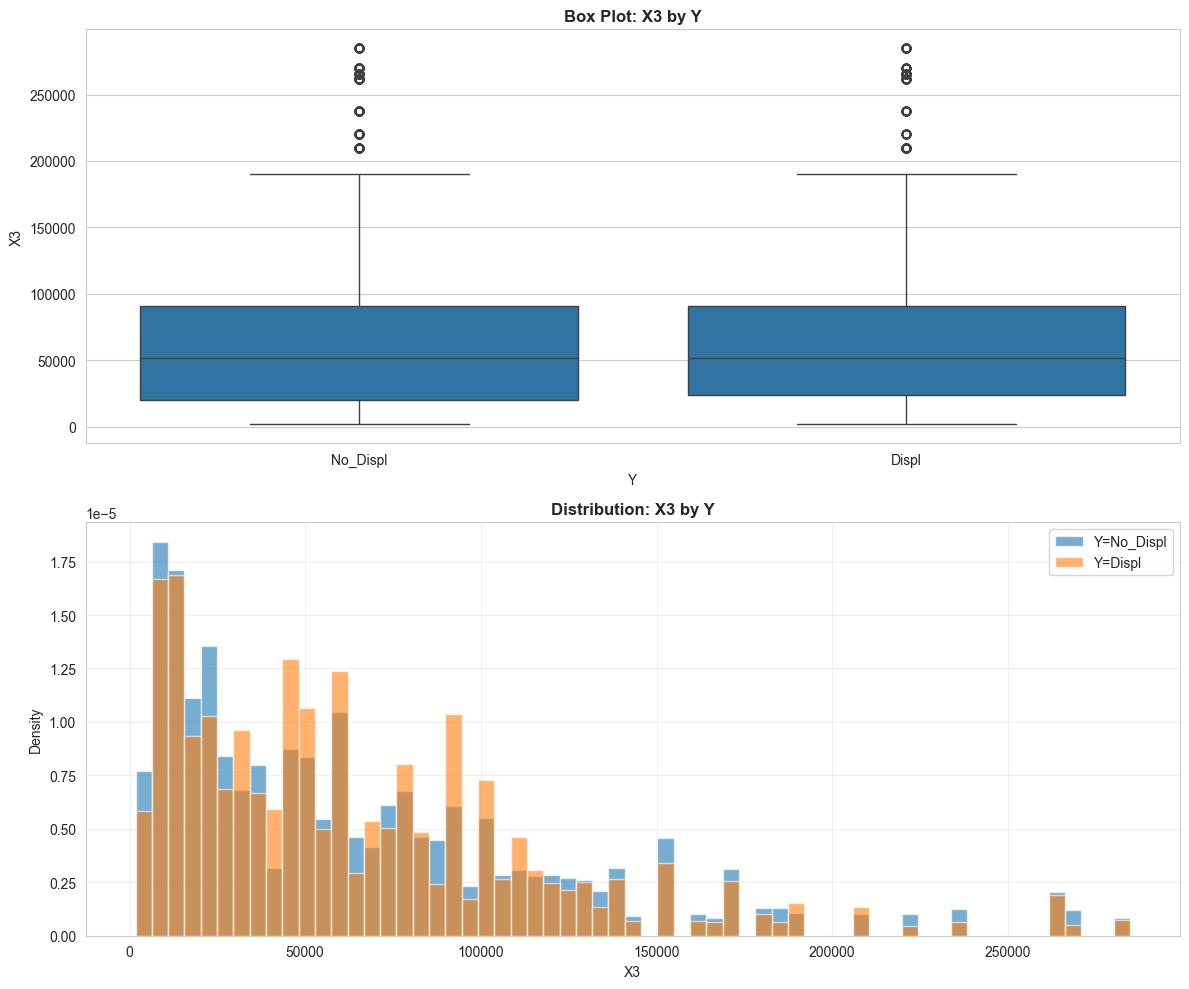


T-test results (No_Displ vs Displ): t-statistic=1.7737, p-value=0.0761
Mann-Whitney U test (No_Displ vs Displ): U-statistic=81888038.5000, p-value=0.0455

--- Analysis for X4 ---

Statistical summary of X4 by Y:
            count       mean        std  min   25%   50%   75%    max
Y                                                                    
Displ     12782.0  43.163589  28.853245  1.0  26.0  32.0  43.0  198.0
No_Displ  13000.0  32.222154  14.740383  1.0  25.0  30.0  40.0  172.0


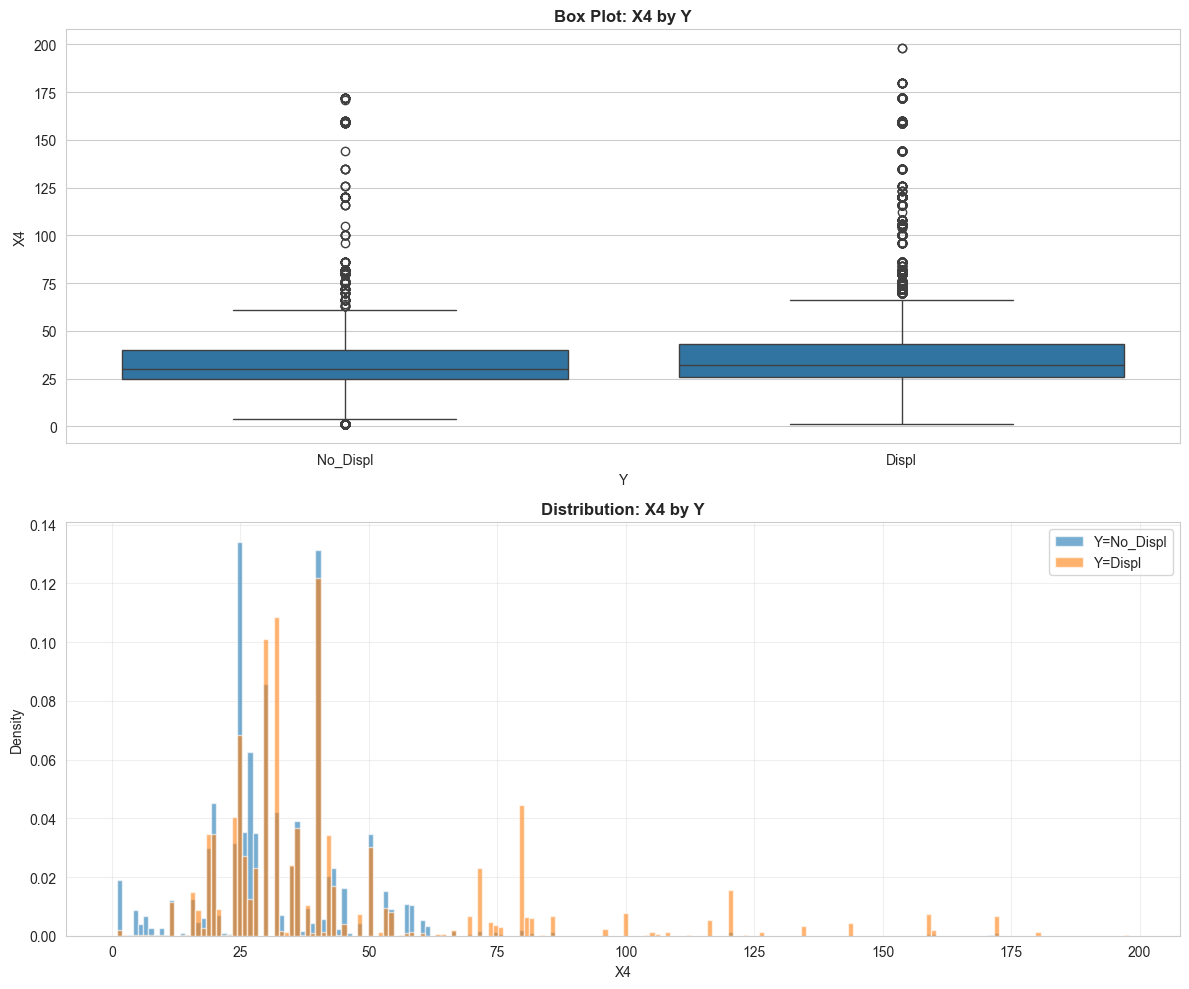


T-test results (No_Displ vs Displ): t-statistic=-38.4353, p-value=0.0000
Mann-Whitney U test (No_Displ vs Displ): U-statistic=66716861.5000, p-value=0.0000

--- Analysis for X6 ---

Statistical summary of X6 by Y:
            count         mean          std  min   25%    50%    75%      max
Y                                                                            
Displ     12782.0  1018.168709  2484.242123  1.0  80.0  250.0  860.0  48816.0
No_Displ  13000.0   164.757837   387.434936  1.0  38.0   80.0  171.0  17329.0


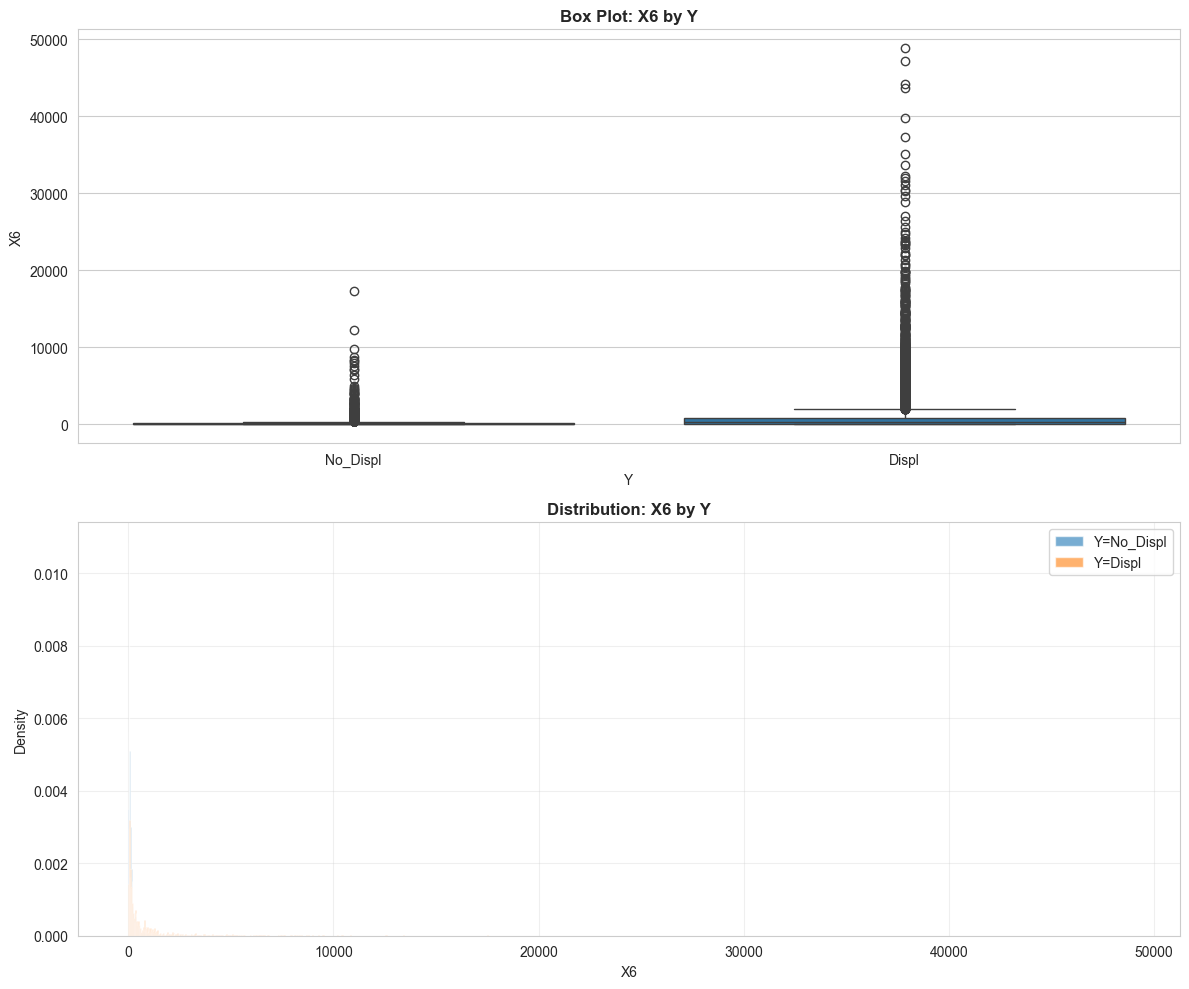


T-test results (No_Displ vs Displ): t-statistic=-38.6928, p-value=0.0000
Mann-Whitney U test (No_Displ vs Displ): U-statistic=47059127.0000, p-value=0.0000


In [ ]:
# ============================================================================
# 5. DISTRIBUTION OF Y OVER CONTINUOUS VARIABLES
# ============================================================================
import numpy as np # Ensure numpy is imported

print("\n" + "=" * 80)
print("DISTRIBUTION ANALYSIS: Y vs CONTINUOUS VARIABLES")
print("=" * 80)

# Get unique values of Y
y_values = df[target].unique()
print(f"\nUnique Y values: {y_values}")

# Create distribution plots for each continuous variable
for var in continuous_vars:
    print(f"\n--- Analysis for {var} ---")
    
    # Statistical summary by Y value
    summary_by_y = df.groupby(target)[var].describe()
    print(f"\nStatistical summary of {var} by Y:")
    print(summary_by_y)
    
    # Create visualization
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Box plot
    sns.boxplot(data=df, x=target, y=var, ax=axes[0])
    axes[0].set_title(f'Box Plot: {var} by {target}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(target, fontsize=10)
    axes[0].set_ylabel(var, fontsize=10)
    
    # --- UPDATED SECTION START ---
    
    # Calculate common adaptive bin edges for the whole variable
    # 'auto' uses the Freedman-Diaconis rule which is robust to outliers
    valid_data = df[var].dropna()
    if len(valid_data) > 0:
        common_bins = np.histogram_bin_edges(valid_data, bins='auto')
    else:
        common_bins = 50 # Fallback if data is empty

    # Histogram/Density plot
    for y_val in y_values:
        subset = df[df[target] == y_val][var]
        # Use the pre-calculated common_bins here
        axes[1].hist(subset, alpha=0.6, label=f'{target}={y_val}', bins=common_bins, density=True)
    
    # --- UPDATED SECTION END ---

    axes[1].set_title(f'Distribution: {var} by {target}', fontsize=12, fontweight='bold')
    axes[1].set_xlabel(var, fontsize=10)
    axes[1].set_ylabel('Density', fontsize=10)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical test (t-test or Mann-Whitney)
    from scipy import stats
    
    # Only compare the two actual classes (No_Displ and Displ), exclude any other values
    actual_classes = ['No_Displ', 'Displ']
    groups = [df[df[target] == y_val][var].dropna().values for y_val in actual_classes if y_val in y_values]
    
    if len(groups) == 2 and len(groups[0]) > 0 and len(groups[1]) > 0:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
        print(f"\nT-test results (No_Displ vs Displ): t-statistic={t_stat:.4f}, p-value={p_value:.4f}")
        
        # Mann-Whitney U test (non-parametric alternative)
        u_stat, p_value_mw = stats.mannwhitneyu(groups[0], groups[1], alternative='two-sided')
        print(f"Mann-Whitney U test (No_Displ vs Displ): U-statistic={u_stat:.4f}, p-value={p_value_mw:.4f}")


CONFUSION MATRIX ANALYSIS: NOMINAL FEATURES vs Y

Analysis for X5

Cross-tabulation (X5 vs Y):
Y                 Displ  No_Displ    All
X5                                      
AUCHAN             1313      1690   3003
CARREFOUR          2364      2265   4629
CARREFOUR MARKET    731       769   1500
CASINO             2239      1131   3370
CORA                780      1102   1882
ECOMARCHE            45        24     69
FRANPRIX              6        42     48
GEANT               482       279    761
HYPER U              36        35     71
INTERMARCHE        1378      1323   2701
LECLERC            1930      2327   4257
MARCHE U             54        99    153
MATCH                96       145    241
MONOPRIX            394       338    732
OTHERS               24        36     60
PRISUNIC             53        46     99
SHOPI                 0        27     27
SIMPLY MARKET       293       620    913
SUPER U             564       701   1265
All               12782     12999  25781

C

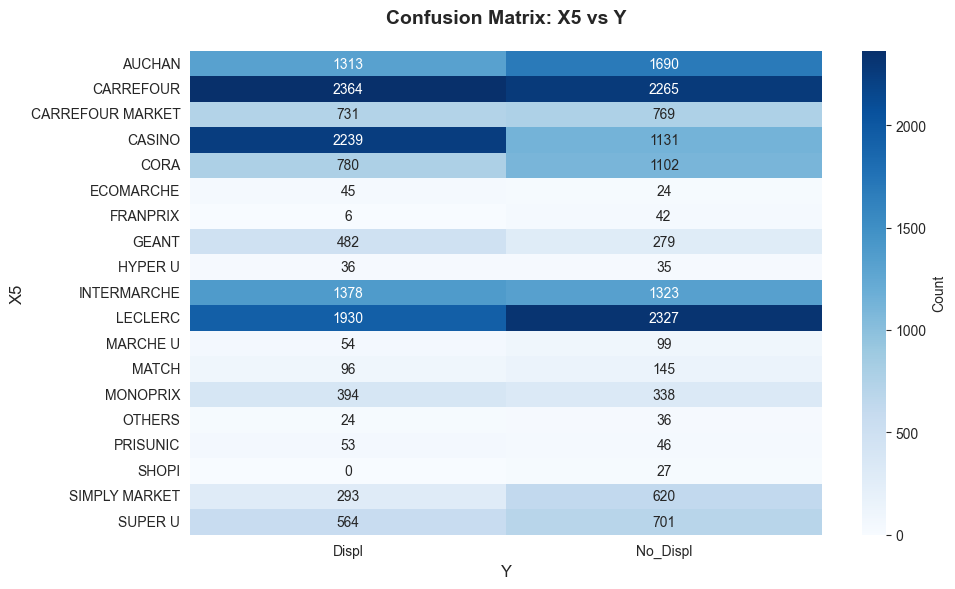

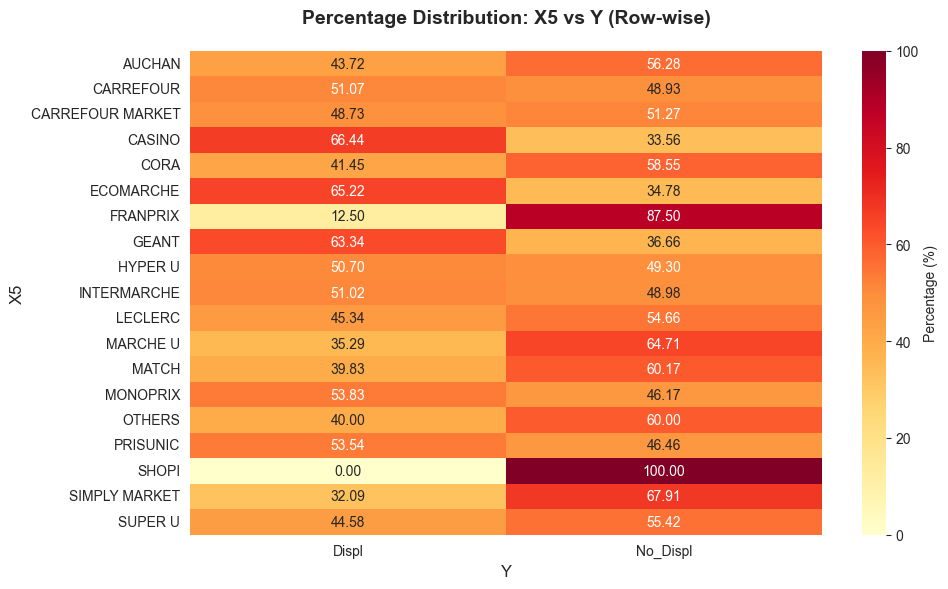


Chi-square test of independence:
  Chi-square statistic: 783.0548
  p-value: 0.0000
  Degrees of freedom: 18
  Interpretation: Variables are dependent (α=0.05)

Analysis for X7

Cross-tabulation (X7 vs Y):
Y        Displ  No_Displ    All
X7                             
Feat      5912       375   6287
No_Feat   6870     12624  19494
All      12782     12999  25781

Confusion Matrix (X7 vs Y):
Y        Displ  No_Displ
X7                      
Feat      5912       375
No_Feat   6870     12624

Percentage distribution (row-wise):
Y        Displ  No_Displ
X7                      
Feat     94.04      5.96
No_Feat  35.24     64.76


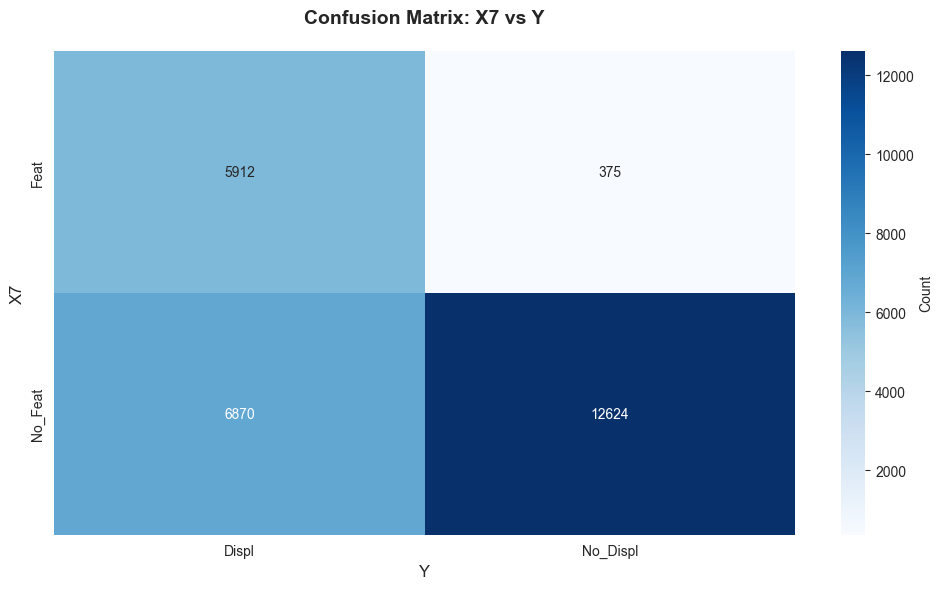

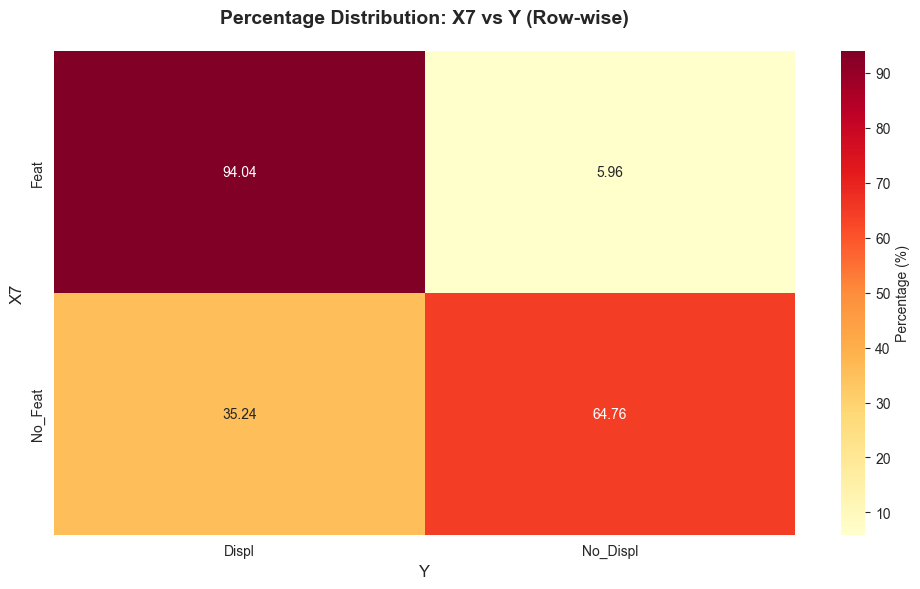


Chi-square test of independence:
  Chi-square statistic: 6571.1530
  p-value: 0.0000
  Degrees of freedom: 1
  Interpretation: Variables are dependent (α=0.05)


In [ ]:
# ============================================================================
# 6. CONFUSION MATRIX FOR NOMINAL FEATURES vs Y
# ============================================================================
print("\n" + "=" * 80)
print("CONFUSION MATRIX ANALYSIS: NOMINAL FEATURES vs Y")
print("=" * 80)

for var in nominal_vars:
    print(f"\n{'='*80}")
    print(f"Analysis for {var}")
    print(f"{'='*80}")
    
    # Cross-tabulation (confusion matrix)
    crosstab = pd.crosstab(df[var], df[target], margins=True)
    print(f"\nCross-tabulation ({var} vs {target}):")
    print(crosstab)
    
    # Confusion matrix (without margins for visualization)
    cm = pd.crosstab(df[var], df[target], margins=False)
    print(f"\nConfusion Matrix ({var} vs {target}):")
    print(cm)
    
    # Calculate percentages
    cm_percent = pd.crosstab(df[var], df[target], normalize='index') * 100
    print(f"\nPercentage distribution (row-wise):")
    print(cm_percent.round(2))
    
    # Visualize confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix: {var} vs {target}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel(target, fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Visualize percentage heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='YlOrRd', 
                cbar_kws={'label': 'Percentage (%)'})
    plt.title(f'Percentage Distribution: {var} vs {target} (Row-wise)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel(target, fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Chi-square test for independence
    from scipy.stats import chi2_contingency
    
    chi2, p_value, dof, expected = chi2_contingency(cm)
    print(f"\nChi-square test of independence:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Interpretation: {'Variables are dependent' if p_value < 0.05 else 'Variables are independent'} (α=0.05)")